In [30]:
#导入包
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [31]:
#分成数据集和测试集
housing = fetch_california_housing()
# print(housing.data.shape)

x_train_all, x_test_raw, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train_raw, x_valid_raw, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)

#对数据进行标准化处理
sca = StandardScaler()
x_train = sca.fit_transform(x_train_raw)
x_valid = sca.transform(x_valid_raw)
x_test = sca.transform(x_test_raw)


In [23]:
#多输入

#搭建模型
input_wide = keras.layers.Input(shape = [5])
input_deep = keras.layers.Input(shape = [6])

hidden1 = keras.layers.Dense(30, activation = 'relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)

concate = keras.layers.concatenate([input_wide, hidden2])

output = keras.layers.Dense(1)(concate)

model = keras.models.Model(inputs = [input_wide,input_deep],
                          outputs = [output])

model.compile(loss = 'mse', optimizer = 'sgd', )


#模型从构建到编译，都与实际的数据无关。在fit之前，都可以对原本的数据进行操作，如分割等。
x_train_wide, x_train_deep = x_train[:,:5], x_train[:,2:]
x_valid_wide, x_valid_deep = x_valid[:,:5], x_valid[:,2:]
x_test_wide, x_test_deep = x_test[:,:5], x_test[:,2:]

history = model.fit([x_train_wide, x_train_deep], y_train,
          validation_data = ([x_valid_wide, x_valid_deep], y_valid),
          epochs = 10)



Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 2s 137us/sample - loss: 0.7928 - val_loss: 0.6233
Epoch 2/10
11610/11610 [==============================] - 1s 82us/sample - loss: 0.5212 - val_loss: 0.5050
Epoch 3/10
11610/11610 [==============================] - 1s 92us/sample - loss: 0.4560 - val_loss: 0.6123
Epoch 4/10
11610/11610 [==============================] - 1s 79us/sample - loss: 0.4405 - val_loss: 0.4572
Epoch 5/10
11610/11610 [==============================] - 1s 89us/sample - loss: 0.4284 - val_loss: 0.4525
Epoch 6/10
11610/11610 [==============================] - 1s 81us/sample - loss: 0.4232 - val_loss: 0.4315
Epoch 7/10
11610/11610 [==============================] - 1s 81us/sample - loss: 0.4172 - val_loss: 0.4260
Epoch 8/10
11610/11610 [==============================] - 1s 78us/sample - loss: 0.4113 - val_loss: 0.4238
Epoch 9/10
11610/11610 [==============================] - 1s 93us/sample - loss: 0.4021 - val_

In [36]:
#多输入&多输出
#多个输入与输出分别都要用中括号括起来，使输入与输出都只有一个项

#搭建模型
input_wide = keras.layers.Input(shape = [5])
input_deep = keras.layers.Input(shape = [6])

hidden1 = keras.layers.Dense(30, activation = 'relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)

concate = keras.layers.concatenate([input_wide, hidden2])

output1 = keras.layers.Dense(1)(concate)
output2 = keras.layers.Dense(1)(hidden2)

model = keras.models.Model(inputs = [input_wide,input_deep],
                          outputs = [output1, output2])

model.compile(loss = 'mse', optimizer = 'sgd', )


#模型从构建到编译，都与实际的数据无关。在fit之前，都可以对原本的数据进行操作，如分割等。
x_train_wide, x_train_deep = x_train[:,:5], x_train[:,2:]
x_valid_wide, x_valid_deep = x_valid[:,:5], x_valid[:,2:]
x_test_wide, x_test_deep = x_test[:,:5], x_test[:,2:]

history = model.fit([x_train_wide, x_train_deep], [y_train,y_train],
          validation_data = ([x_valid_wide, x_valid_deep], [y_valid, y_valid]),
          epochs = 10)


Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 2s 188us/sample - loss: 2.0930 - dense_52_loss: 0.8941 - dense_53_loss: 1.1986 - val_loss: 1.2766 - val_dense_52_loss: 0.5393 - val_dense_53_loss: 0.7372
Epoch 2/10
11610/11610 [==============================] - 1s 92us/sample - loss: 1.1013 - dense_52_loss: 0.4663 - dense_53_loss: 0.6353 - val_loss: 1.0980 - val_dense_52_loss: 0.4795 - val_dense_53_loss: 0.6183
Epoch 3/10
11610/11610 [==============================] - 1s 84us/sample - loss: 1.0045 - dense_52_loss: 0.4384 - dense_53_loss: 0.5661 - val_loss: 0.9905 - val_dense_52_loss: 0.4308 - val_dense_53_loss: 0.5596
Epoch 4/10
11610/11610 [==============================] - 1s 86us/sample - loss: 0.9367 - dense_52_loss: 0.4063 - dense_53_loss: 0.5307 - val_loss: 0.9411 - val_dense_52_loss: 0.4160 - val_dense_53_loss: 0.5250
Epoch 5/10
11610/11610 [==============================] - 1s 91us/sample - loss: 0.8929 - dense_52_loss: 0

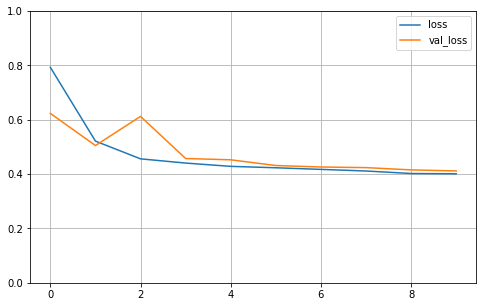

In [25]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)



In [29]:
model.evaluate([x_test_wide, x_test_deep], y_test, y_test, verbose = False)

0.40060963806255845